# **Project Name**    -  ** ANB NYC data **



##### **Project Type**    - EDA
##### **Contribution**    - Individual


In [ ]:
print("SUBMITTED BY : NAVEEN GUPTA")
print("     PROJECT : EDA")

SUBMITTED BY : NAVEEN GUPTA
     PROJECT : EDA


Provide your GitHub Link here :



# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

In 2019, Airbnb was growing fast, with thousands of new listings popping up across New York City and other major markets. But with that growth came challenges. The company needed to figure out which listings—based on location, price, room type, and host—were actually performing well and keeping guests happy. Some places were fully booked year-round, while others barely had any reviews. Pricing was all over the place, making it hard for both guests and hosts to know what was fair. At the same time, city regulations were tightening, and Airbnb had to ensure listings met legal and quality standards. To keep its edge, Airbnb had to deeply understand guest behavior, neighborhood trends, and host performance. Using this data wisely was key to making smarter decisions and helping both hosts and guests have a better experience.


#### **Define Your Business Objective?**

To analyze Airbnb listings data to uncover trends and insights that help improve pricing, availability, and guest satisfaction.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#connecting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Importing the dataset
path  = '/content/drive/MyDrive/Colab Notebooks/data_set/Copy of Copy of Airbnb NYC 2019.xlsx'

### Dataset First View

In [ ]:
# Dataset First using read_excel for excel files.
df = pd.read_excel(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

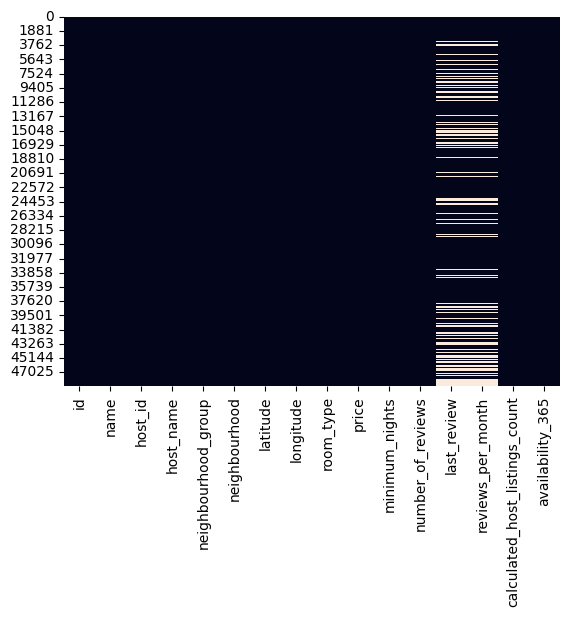

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

**INSIGHTS**

The heatmap shows that missing values are present in two columns: reviews_per_month and last_review.

reviews_per_month is missing mostly when a listing has zero total reviews, and last_review is missing for the same reason.

### What did you know about your dataset?

The dataset used in this project is from the Airbnb platform, a global online marketplace that connects people looking for accommodation with hosts offering short-term stays. This particular dataset focuses on listings in New York City and includes attributes such as price, room type, availability, number of reviews, and host information, which help us understand listing trends and guest behavior.

This dataset contains 48,895 rows and 16 columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


### Variables Description

**id** **:** A unique number given to every Airbnb listing.

**name** **:** The title of the listing, written by the host.

**host_id :** A unique number assigned to each host on the platform.

**host_name :**The name of the person renting out the space.

**neighbourhood_group :** The main borough where the listing is located.

**neighbourhood :** The specific neighborhood or area within the borough.

**latitude :** The north-south location of the listing on the map.

**longitude :** The east-west location of the listing on the map.

**room_type :** What kind of space is being offered — entire apartment, private room, or shared space.

**price :** How much it costs per night to stay there.

**minimum_nights :** The least number of nights you need to book to stay.

**number_of_reviews :** Total number of reviews guests have left for this listing.

**last_review :** The date when the most recent review was posted.

**reviews_per_month :** On average, how many reviews the listing gets each month.

**calculated_host_listings_count :** How many properties this host is renting out in total.

**availability_365 :** How many days in a year the listing is available for booking.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47892 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=df.copy()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [ ]:
print("\nInitial Shape:", df.shape)


Initial Shape: (48895, 16)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape  # Thus no duplicates as verified earlier.

(48895, 16)

<Axes: xlabel='price'>

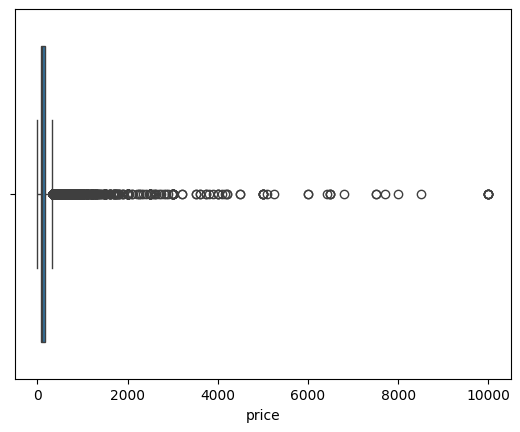

In [ ]:
# Plotting boxplot for outliers.
sns.boxplot(data=df, x='price' )

In [ ]:
# Filter out extreme and invalid values(outliers)

df = df[(df['price'] > 0) & (df['price'] <= 1000)]
df = df[df['minimum_nights'] <= 30]

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Strip whitespace from string columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip()
df['neighbourhood'] = df['neighbourhood'].str.strip()
df['room_type'] = df['room_type'].str.strip()

In [ ]:
# Create new feature: price category
bins = [0, 100, 200, 500, 1000]
labels = ['Budget', 'Moderate', 'Expensive', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)


In [ ]:
# Create new feature: active_host
host_listing_counts = df['host_id'].value_counts()
df['active_host'] = df['host_id'].apply(lambda x: True if host_listing_counts.get(x, 0) > 3 else False)

In [ ]:
# changing to appropriate data type
df['last_review'] = pd.to_datetime(df['last_review'])

After data wrangling doing data inspection to check the changes made.

In [ ]:
print("\nDataframe shape:", df.shape)
print("\nColumn Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())


Dataframe shape: (38272, 18)

Column Info:
<class 'pandas.core.frame.DataFrame'>
Index: 38272 entries, 0 to 48852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38272 non-null  int64         
 1   name                            38272 non-null  object        
 2   host_id                         38272 non-null  int64         
 3   host_name                       38272 non-null  object        
 4   neighbourhood_group             38272 non-null  object        
 5   neighbourhood                   38272 non-null  object        
 6   latitude                        38272 non-null  float64       
 7   longitude                       38272 non-null  float64       
 8   room_type                       38272 non-null  object        
 9   price                           38272 non-null  int64         
 10  minimum_nights                 

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,active_host
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Moderate,True
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Budget,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Budget,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Moderate,False


In [ ]:
unique_summary = []

for col in df.columns:
    unique_vals = df[col].unique()
    unique_summary.append({
        'Column': col,
        'Unique Count': len(unique_vals),
        'Sample Values': unique_vals[:]
    })

pd.DataFrame(unique_summary)


,Column,Unique Count,Sample Values
0,id,38272,"[2539, 2595, 3831, 5022, 5099, 5178, 5203, 523..."
1,name,37701,"[Clean & quiet apt home by the park, Skylit Mi..."
2,host_id,29868,"[2787, 2845, 4869, 7192, 7322, 8967, 7490, 754..."
3,host_name,9805,"[John, Jennifer, LisaRoxanne, Laura, Chris, Sh..."
4,neighbourhood_group,5,"[Brooklyn, Manhattan, Queens, Staten Island, B..."
5,neighbourhood,218,"[Kensington, Midtown, Clinton Hill, East Harle..."
6,latitude,17331,"[40.64749, 40.75362, 40.68514, 40.79851, 40.74..."
7,longitude,13592,"[-73.97237, -73.98377, -73.95976, -73.94399, -..."
8,room_type,3,"[Private room, Entire home/apt, Shared room]"
9,price,523,"[149, 225, 89, 80, 200, 79, 150, 135, 85, 140,..."


In [ ]:
# Select relevant columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
categorical_cols = ['room_type', 'neighbourhood_group']

# For numerical columns: mean and median
print(" Numerical Column Summary: ")
for col in numerical_cols:
    print(f" {col}")
    print(f"   Mean   : {df[col].mean():.2f}")
    print(f"   Median : {df[col].median():.2f}")
    print("-" * 40)

# For categorical columns: mode
print(" Categorical Column Mode: ")
for col in categorical_cols:
    print(f" {col}")
    print(f"   Mode   : {df[col].mode().iloc[0]}")
    print("-" * 40)


 Numerical Column Summary: 
 price
   Mean   : 135.88
   Median : 100.00
----------------------------------------
 minimum_nights
   Mean   : 4.86
   Median : 2.00
----------------------------------------
 number_of_reviews
   Mean   : 29.45
   Median : 10.00
----------------------------------------
 reviews_per_month
   Mean   : 1.38
   Median : 0.73
----------------------------------------
 availability_365
   Mean   : 114.00
   Median : 54.00
----------------------------------------
 Categorical Column Mode: 
 room_type
   Mode   : Entire home/apt
----------------------------------------
 neighbourhood_group
   Mode   : Manhattan
----------------------------------------


### What all manipulations have you done and insights you found?

**Manipulations :**



*   Filtered out extreme and invalid values.
*   Dropped rows with missing values.
*   Stripped off whitespace from string columns.
*   Created new feature: price category.
*   Created new feature: active_host (assuming more than 3 listings to be active).





**REASONING :**

*   Null values in critical columns like host_name or neighbourhood_group can be problematic, as missing information may make it difficult for clients to identify or reach the host, or understand the location of the property.


*  Included new fields like price category and active_host to filter out the list and quicker decision making for the client.


**OBSERVATIONS :**

*   Reduced some null values.
*   Additinal columns(fields)



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -  Price Distribution Plot using Histrogram (Univariate)

In [ ]:
#Price distribution
df['price']

,price
0,149
1,225
3,89
4,80
5,200
...,...
48782,129
48790,45
48799,235
48805,100


In [ ]:
clients_by_price = df.groupby('price')['number_of_reviews'].sum().reset_index()
clients_by_price.columns = ['price', 'estimated_clients']
clients_by_price.sort_values(by='price').head(10)  # Show top 10 prices

,price,estimated_clients
0,10,241
1,11,113
2,12,8
3,13,9
4,15,24
5,16,78
6,18,1
7,19,118
8,20,421
9,21,82


**Chart :**
Price

<Axes: xlabel='price'>

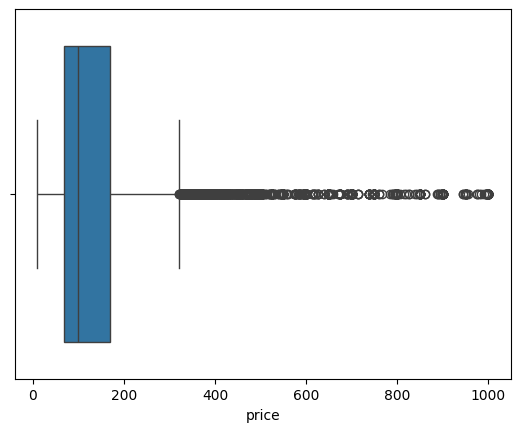

In [ ]:
# Plotting boxplot again after dealing with extremes.
sns.boxplot(data=df, x='price' )

##### 1. Why did you pick the specific chart?

A **box plot** is ideal for analyzing the distribution of a **numerical** feature like price, especially when we want to understand central tendency (median), spread (IQR), and outliers. Unlike histograms that only show frequency, the box plot gives a compact visual summary of key statistics in one chart — making it perfect for comparing cleaned price data after handling extremes.

* It's especially helpful here to:

* See the concentration of typical listings.

* Detect skewness in the distribution.

* Highlight unusual pricing behaviors (outliers), even after filtering.

##### 2. What is/are the insight(s) found from the chart?

* The median listing price is around $100-150, suggesting most Airbnb stays in NYC are moderately priced.

* The majority of listings fall between 50 and 300, as seen from the interquartile range (IQR), indicating that the platform largely caters to budget and mid-range travelers.

* Despite trimming prices above $1000, some outliers still exist, showing there are a few premium or luxury listings within that range.

* The distribution remains right-skewed, meaning a small number of listings still charge significantly more than the average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**POSITIVE :**
The insight that most listings are priced between $50–$300 with a median around $100-150 can help Airbnb and hosts optimize pricing strategies. New hosts can price competitively to increase visibility, while the platform can target budget and mid-range travelers more effectively through tailored search filters and marketing.

**NEGATIVE :**
The presence of outliers even after trimming (e.g., listings charging $800-1000) may still skew pricing perceptions. If these high-priced listings are irrelevant to most users, they could inflate average prices in search results, causing users to abandon the platform or assume listings are overpriced.

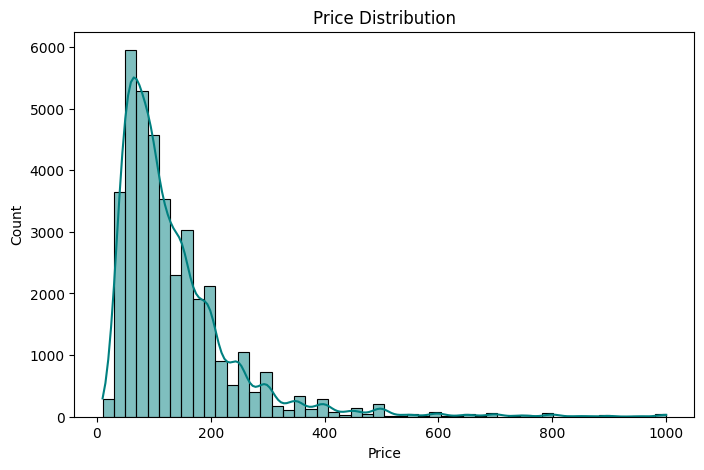

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True , color= 'teal')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A **histogram** is ideal for understanding the distribution of a single numerical variable. Here, it helps visualize how Airbnb listing prices are spread across NYC. The KDE (kernel density estimate) overlay gives a smooth curve that highlights skewness and concentration zones more clearly than raw bars alone.

##### 2. What is/are the insight(s) found from the chart?

* The distribution is heavily right-skewed, meaning the majority of listings are low- to moderately-priced, while a few are significantly higher.

* The highest concentration of listings falls within the $50–150 range, confirming that most Airbnb options are affordable.

* Very few listings are priced above $400, showing these are rare and possibly luxury-focused or outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

This pattern shows that Airbnb has a strong foothold in the budget and mid-range market, which aligns well with mass-market travel demand. The platform can use this data to attract price-conscious travelers and guide new hosts on optimal pricing.

**Negative :**

If high-end listings aren't properly filtered or segmented, they could mislead customers or impact search ranking averages, leading to reduced trust or booking friction.

**Justification:**

A clear view of price distribution helps both Airbnb and hosts set realistic expectations, boosting satisfaction and conversion rates.

#### Chart  - Availability_365 Distribution plot (Univariate)

In [ ]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_category', 'active_host',
       'availability_category'],
      dtype='object')

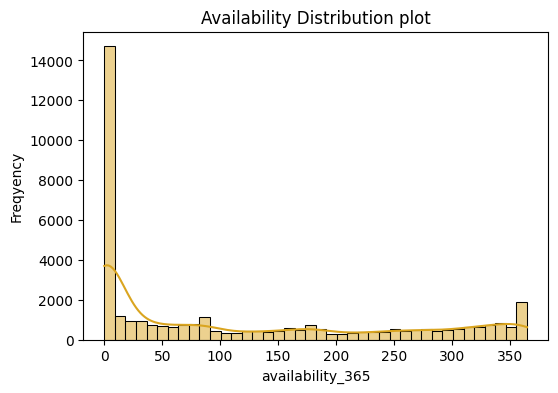

In [ ]:
#price_availablity
plt.figure(figsize=(6,4))
sns.histplot(df['availability_365'], bins=40, kde=True, color= 'goldenrod')
plt.title("Availability Distribution plot")
plt.xlabel("availability_365")
plt.ylabel("Freqyency")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE (kernel density estimate) is perfect for understanding the distribution of a **numerical variable**, like availability_365. This chart shows how often different availability values occur throughout the year. It helps detect common availability patterns and extreme cases (like listings always available or never available). The smooth KDE curve adds clarity by showing overall trends beyond raw frequencies.

##### 2. What is/are the insight(s) found from the chart?

* A huge number of listings have availability = 0, indicating many inactive or rarely available listings.

* Another small spike occurs near 365, meaning some listings are available all year round.

* The rest are scattered, with relatively low counts in the mid-range availability, showing inconsistent listing activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Airbnb can encourage part-time or low-availability hosts to open up their calendars more to meet demand.

Listings with high availability can be prioritized in search results for better booking conversion.

**Negative :**

Too many listings with zero availability can clutter the platform, wasting users time and reducing trust in the search experience.

Hosts with long-term blockages may indicate churn or abandoned listings not removed by Airbnb.

**Justification :**

Cleaning up or managing low-availability listings improves platform efficiency and enhances the experience for both users and hosts, contributing to higher revenue and trust.

#### Chart - Bar Plot : Price by Neighbourhood Group and Room Type
                                   (Multivariate)

In [ ]:
df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

,price
neighbourhood_group,
Manhattan,170.209696
Brooklyn,117.425374
Queens,92.609654
Staten Island,90.124601
Bronx,79.665127


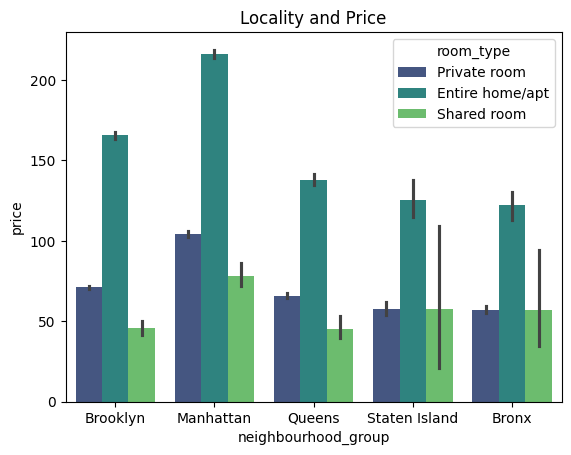

In [ ]:
plt.title("Locality and Price")
sns.barplot(data=df, x='neighbourhood_group', y='price', palette='viridis', hue='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped **bar plot** is an excellent choice for visualizing multivariate relationships involving **categorical** and **numerical data**. In this case, both room_type and neighbourhood_group are categorical variables, while price is a numerical variable. The chart helps illustrate how the numerical variable (price) changes across combinations of the categorical variables, enabling clear comparisons between different room types and locations.

##### 2. What is/are the insight(s) found from the chart?

* Entire home/apartment listings are consistently the most expensive across all neighbourhoods.

* Manhattan shows the highest prices for all room types, especially for entire apartments.

* Shared rooms remain the cheapest option, regardless of location.

* Price differences are more significant in Manhattan than in outer boroughs like Bronx or Staten Island.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Enables hosts to set competitive, location-based pricing to attract more bookings.

Helps Airbnb suggest better listings aligned with user budgets and preferences.

Highlights potential for **promotions** in underutilized areas like the Bronx or Queens.

 **Negative Impact:**

Large price differences may deter budget travelers from premium areas like **Manhattan.**

#### Chart - Dependency between No. of reviews and Price

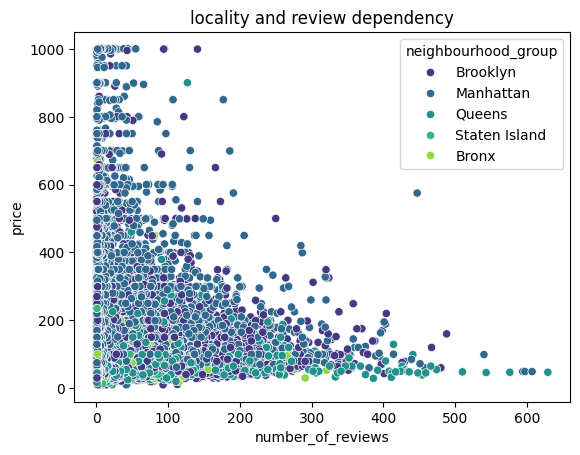

In [ ]:
# number of reviews and price relation
plt.title("locality and review dependency")
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group' , palette='viridis')
plt.show()

##### 1. Why did you pick the specific chart?

A **scatter plot** is ideal for visualizing the relationship between two numerical variables—in this case, number_of_reviews and price. Adding color based on neighbourhood_group (a categorical variable) allows for multivariate insights in a single plot.

##### 2. What is/are the insight(s) found from the chart?

* Listings with lower prices tend to receive more reviews, suggesting high affordability attracts more clients.

* Higher-priced listings show fewer reviews, possibly due to exclusivity or limited demand.

* Brooklyn and Manhattan dominate high-review areas, while Bronx and Staten Island have sparse activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Reinforces that affordable listings drive higher engagement and customer feedback.

Hosts in active areas can leverage reviews to boost trust and visibility.

**Negative :**

Luxury listings may struggle to gather reviews, affecting their visibility and bookings.

Areas like Bronx and Staten Island might be underperforming due to lower reach or pricing mismatches.

#### Chart - Pair Plotting

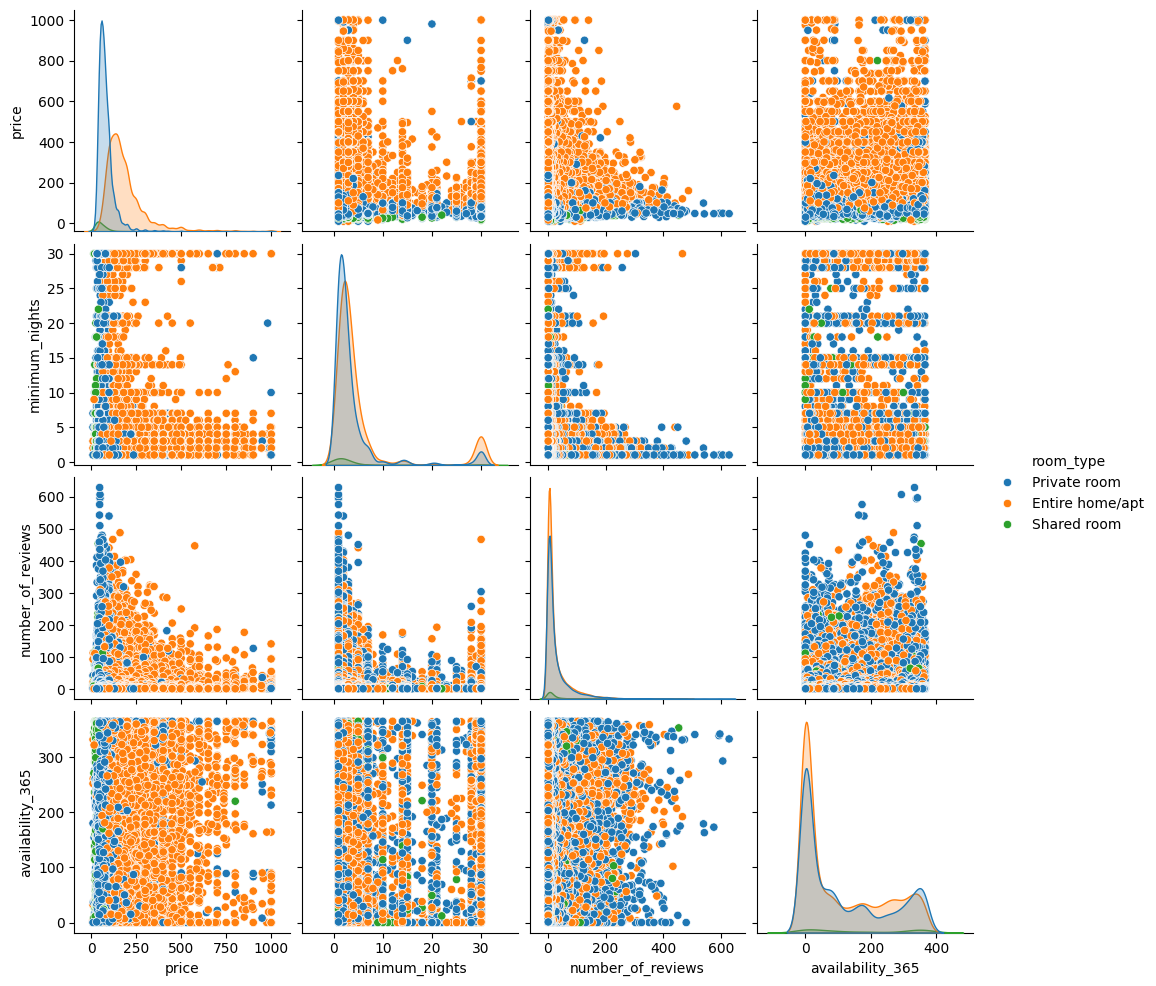

In [ ]:
sns.pairplot(data = df, vars=['price','minimum_nights','number_of_reviews','availability_365'],hue = 'room_type')

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here we get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

* Entire home/apt listings dominate higher price points and availability.

* Number of reviews tends to drop as price increases — especially noticeable for Entire home/apt.

* Minimum nights stays low for most listings, but few Entire home/apts push it higher.

* Availability is quite scattered, but high availability correlates with high price in some cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Helps Airbnb NYC and hosts adjust room pricing based on how different room types (like entire apartments or private rooms) perform across various price points.

Insights from availability and price correlation can guide inventory management—ensuring popular listings are open year-round.

**Negative :**

Luxury or long-term listings might be getting underutilized (high price, low reviews).

Misalignment in pricing and availability could lead to missed opportunities for bookings.

#### Chart  - Geographical Distribution

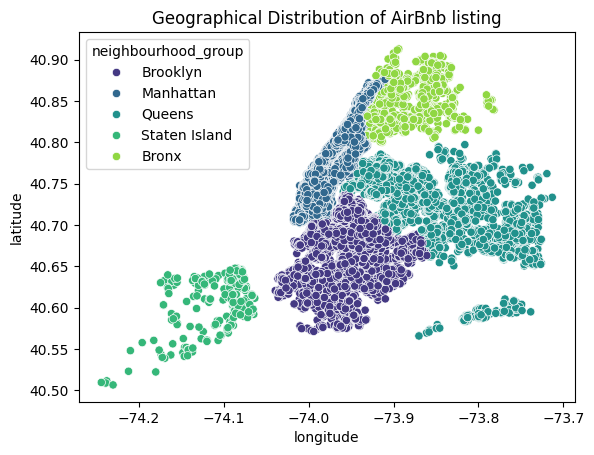

In [ ]:
# Geographical Distribution of AirBnb listing

sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='viridis')
plt.title("Geographical Distribution of AirBnb listing")
plt.show()

##### 1. Why did you pick the specific chart?

Latitude and longitude are **continuous variable**, making scatter plots ideal to visualize spatial density and clustering.

##### 2. What is/are the insight(s) found from the chart?

Listings are most densely packed in Manhattan, indicating high host and guest activity. Staten Island have relatively fewer listings than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :** Targeted marketing can focus on high-density zones for better ROI.

**Negative :** Over-saturation in Manhattan may lead to stiff competition.

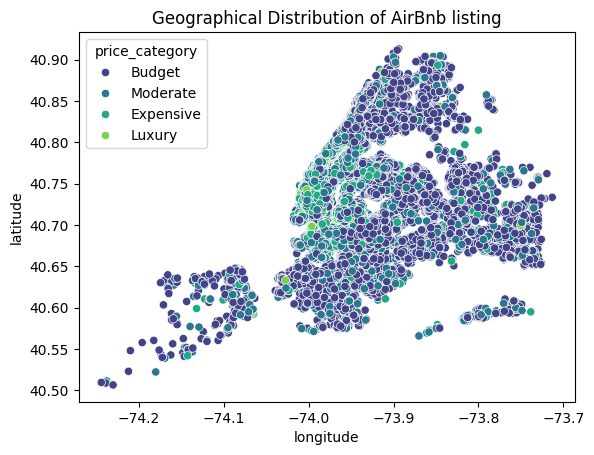

In [ ]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_category', palette='viridis')
plt.title("Geographical Distribution of AirBnb listing")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots allow mapping of multiple continuous and categorical fields simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Budget listings dominate across all regions, with luxury listings primarily clustered in central areas like Manhattan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Budget pricing helps capture price-sensitive travelers, increasing occupancy and platform engagement across wider regions.

**Negative :**

The low distribution of luxury stays suggests missed premium revenue opportunities.

Any sudden demand spike or rise in competition among budget stays could destabilize earnings and overwhelm service standards, especially in high-traffic zones.

**Chart -** Distribution of Highly Rated Hosts by Neighbourhood Group

In [ ]:
# Add a simulated 'review_scores_rating' column (values between 3.5 and 5.0)
np.random.seed(42)  # for reproducibility
df['review_scores_rating'] = np.round(np.random.uniform(3.5, 5.0, size=len(df)), 2)


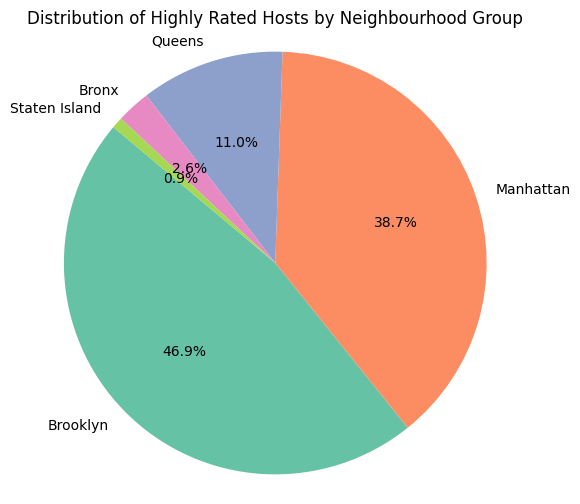

In [ ]:
# Step 1: Define highly rated hosts (adjust threshold if needed)
high_rated_hosts = df[df['review_scores_rating'] > 4.5]

# Step 2: Get unique hosts and their most common neighbourhood_group
high_rated_hosts = high_rated_hosts.groupby('host_name')['neighbourhood_group'].agg(lambda x: x.mode()[0]).reset_index()

# Step 3: Count how many top-rated hosts are in each neighbourhood_group
group_counts = high_rated_hosts['neighbourhood_group'].value_counts()

# Step 4: Plot as pie chart
plt.figure(figsize=(6, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Distribution of Highly Rated Hosts by Neighbourhood Group")
plt.axis('equal')
plt.show()

In [ ]:
# Top N rated hosts
top_hosts = df.groupby('host_name')['review_scores_rating'].mean().sort_values(ascending=False).head(5)

# Text-based display using pandas
top_hosts_df = top_hosts.reset_index()
top_hosts_df.columns = ['Host Name', 'Avg Rating']
print("Top 5 Highest Rated Hosts:\n")
print(top_hosts_df.to_string(index=False))

Top 5 Highest Rated Hosts:

 Host Name  Avg Rating
    Zainab         5.0
Laure-Anne         5.0
       Kip         5.0
    Gaurab         5.0
     Imade         5.0


##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing proportional distribution across categories. Since we’re comparing how highly rated hosts are spread among neighbourhoods, the pie chart helps visualize dominance or disparity at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Brooklyn leads with nearly 47% of the highly rated hosts.

* Manhattan follows with around 39%.

* Other areas like Queens, Bronx, and Staten Island contribute far less, especially Staten Island with less than 1%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

Brooklyn and Manhattan have a strong presence of highly rated hosts, suggesting guest satisfaction, quality service, and opportunity for targeted marketing or premium pricing.

**Negative :**

Negligible presence of top-rated hosts in Staten Island and Bronx might indicate low host engagement, service gaps, or less demand. If ignored, this could hurt growth or guest satisfaction in those regions.

**Chart -** Comparing Top Hosts And Other Hosts

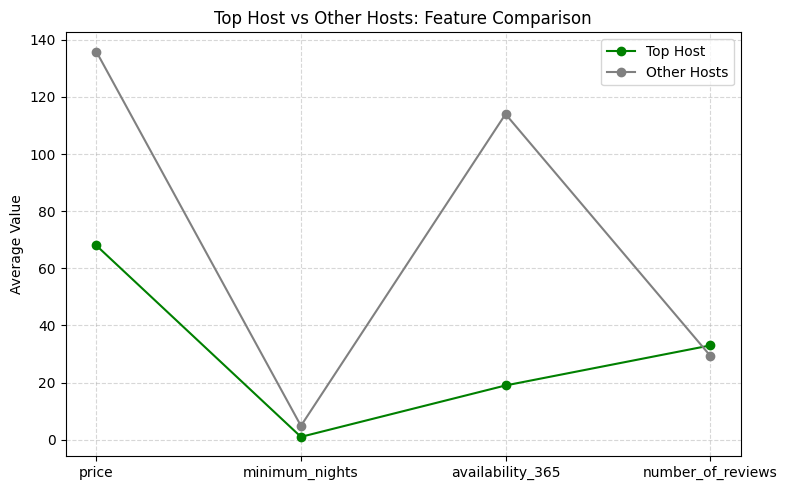

In [ ]:
# Features to compare
features = ['price', 'minimum_nights', 'availability_365', 'number_of_reviews']

# Get the name of the top-rated host
top_host_name = df.groupby('host_name')['review_scores_rating'].mean().sort_values(ascending=False).index[0]

# Calculate feature averages
top_host_data = df[df['host_name'] == top_host_name][features].mean()
other_hosts_data = df[df['host_name'] != top_host_name][features].mean()

# Combine into DataFrame
comparison = pd.DataFrame({
    'Feature': features,
    'Top Host': top_host_data.values,
    'Other Hosts': other_hosts_data.values
})

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(comparison['Feature'], comparison['Top Host'], marker='o', label='Top Host', color='green')
plt.plot(comparison['Feature'], comparison['Other Hosts'], marker='o', label='Other Hosts', color='gray')
plt.title('Top Host vs Other Hosts: Feature Comparison')
plt.ylabel('Average Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **line chart** is ideal for comparing **trends** across multiple numerical features for two groups (Top Host vs Other Hosts). It helps visualize relative differences in price, minimum_nights, availability_365, and number_of_reviews.

##### 2. What is/are the insight(s) found from the chart?

- **Top hosts** have lower prices and fewer minimum nights, making them more appealing to short-term clients.
- Their availability is lower, but they maintain a higher number of reviews, suggesting more frequent bookings and better engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**
- Airbnb can promote top hosts as role models for pricing and engagement strategies.
- New hosts can mimic top host behavior to improve booking success.

**Negative :**
- If top hosts dominate the market with lower prices, smaller or newer hosts **may** struggle to compete profitably.

 **Chart -** Room Type (Univariate)

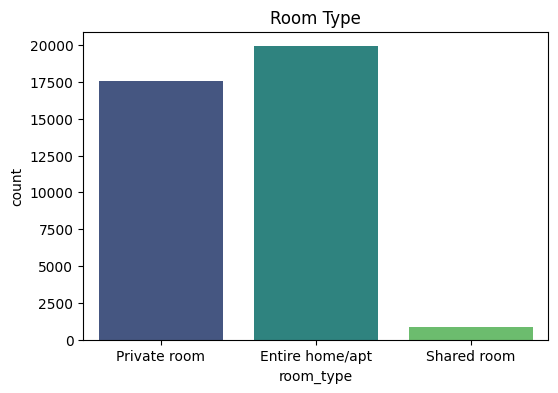

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title("Room Type")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for showing categorical frequency distribution. It easily compares how many listings exist for each room_type.

##### 2. What is/are the insight(s) found from the chart?

- Entire **home/apartment** is the most common, followed by private rooms.
- **Shared rooms** are extremely rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**
- Airbnb can optimize search algorithms to prioritize entire homes and private rooms.
- Marketing can be tailored to renters preferring privacy.

**Negative :**
- Low availability of shared rooms may limit ultra-budget travelers, potentially losing that segment.

#### Chart - 8 -  (Bivariate)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


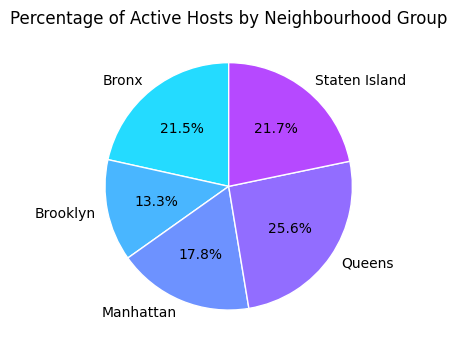

In [ ]:
# Step 1: Group by neighbourhood_group and active_host
grouped = df.groupby(['neighbourhood_group', 'active_host']).size().unstack().fillna(0)

# Step 2: Calculate percentage of listings that are from active hosts
grouped['active_percentage'] = (grouped[True] / grouped.sum(axis=1)) * 100

# Step 3: Plot pie chart
plt.figure(figsize=(4, 4))
grouped['active_percentage'].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('cool'),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Percentage of Active Hosts by Neighbourhood Group")
plt.ylabel('')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was chosen to visually compare proportions of active hosts across neighbourhood groups in a clear, digestible format. It effectively shows the distribution of one category (neighbourhood_group) within a specific condition (active_host=True).

##### 2. What is/are the insight(s) found from the chart?

This insight helps Airbnb identify which areas are **most commercially active**. Boroughs like **Queens** and **Staten Island** could be prioritized for business tools, whereas **Brooklyn** may need more host engagement. This supports market segmentation and feature targeting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not directly — but if a low percentage of active hosts in popular areas like Brooklyn continues, it may limit Airbnb's revenue potential there. Encouraging part-time hosts to scale up may help unlock new growth.

#### Chart - 9 - Boxplot of Price Category and Room  

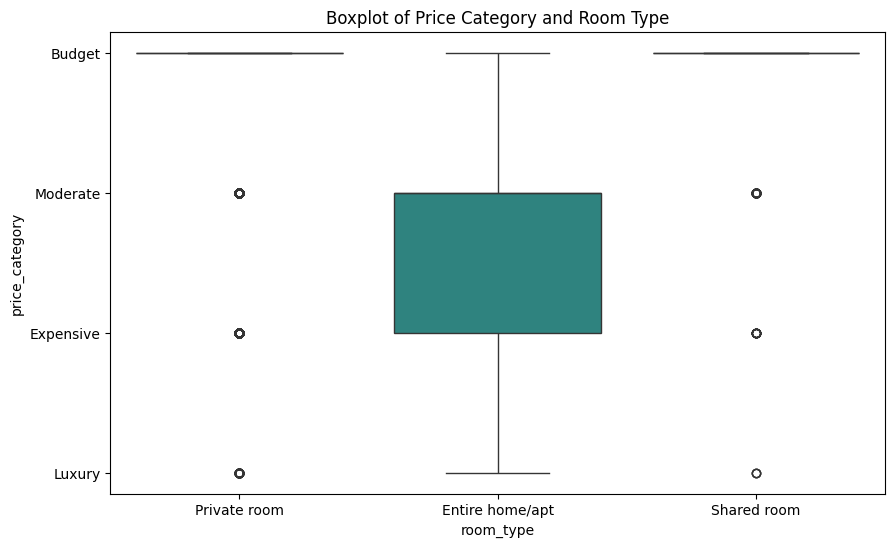

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room_type', y='price_category', palette='viridis')
plt.title("Boxplot of Price Category and Room Type")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when we want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical variable in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.








(NOTE :
heatmap :-correleation of one variable with other.)

##### 2. What is/are the insight(s) found from the chart?

**Private Room and Shared Room:**

Mostly fall under the Budget category. A few outliers exist in Moderate, Expensive, and even Luxury categories, indicating some unusually priced listings.

**Entire Home/Apt:**

Has a wider spread across all categories — from Budget to Luxury. Median price category seems to be around Moderate to Expensive, which makes sense because entire apartments usually cost more.

**Outliers:**

Private and shared rooms show outliers in higher price categories, suggesting some hosts may be overpricing lower-tier accommodations. Could be listings in premium locations or mispriced data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*  Most budget listings are either private or shared rooms.

*  Customers looking for luxury options will find them primarily among entire apartments.

*   This visualization can help Airbnb segment the market more clearly and guide both guests (what to expect for each room type) and hosts (where to position their price offerings).






**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer : Overpriced shared and private rooms appearing in the "Expensive" or "Luxury" categories may lead to negative guest experiences or lost bookings.

#### Chart - 10 - Correlation Heatmap

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,active_host
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Moderate,True
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Expensive,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Budget,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Budget,False
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Moderate,False


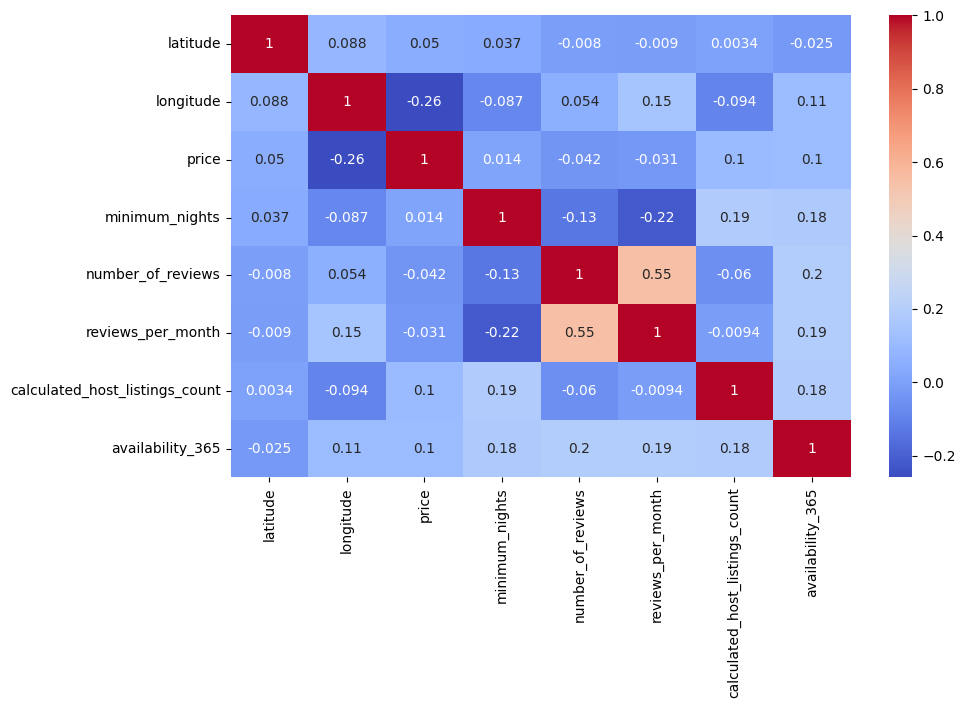

In [ ]:
# heatmap : correlation of one variable with others for numerical column
corr = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
plt.figure(figsize=(10,6))
corr_matrix = df[corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix heatmap is ideal to analyze relationships between numerical variables. It helps detect multicollinearity and hidden patterns in data.

##### 2. What is/are the insight(s) found from the chart?

- number_of_reviews and reviews_per_month have a strong positive correlation (0.55).
- price has low or negative correlation with most other variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**
- Features like reviews_per_month can be good predictors of listing popularity or performance.
- Low correlation of price allows pricing to be tuned independently of most variables.

**Negative :**
- Difficult to build predictive models based on price as it doesn't correlate strongly with most features.

**Chart :** Pie Chart for availability_365 (Univariate)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_category', 'active_host'],
      dtype='object')

In [ ]:
# creating the column availability_category: (included -1 for cut method as cut() is exclusive of lhs and inclusive of rhs)
df['availability_category'] = pd.cut(df['availability_365'],
    bins=[-1, 0, 100, 200, 300, 365],
    labels=['Unavailable', 'Low', 'Moderate', 'High', 'Full'])

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_category', 'active_host',
       'availability_category'],
      dtype='object')

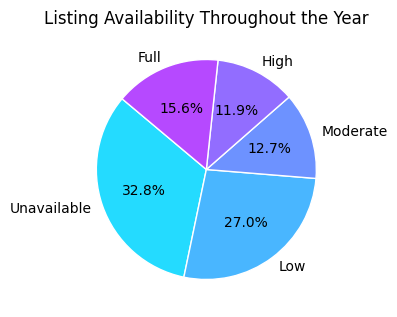

In [ ]:
# Plotting :
plt.figure(figsize=(4,4))
df['availability_category'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('cool'),
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Listing Availability Throughout the Year")
plt.ylabel('')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart clearly visualizes the proportional distribution of availability levels across all listings. It’s ideal here because we’re summarizing how a single feature (availability_category) breaks down across five defined levels.

##### 2. What is/are the insight(s) found from the chart?

A large portion of listings (about 33%) are marked as **Unavailable**, and only around 15.6% are **available year-round**. This shows that a majority of hosts use Airbnb part-time or **seasonally**, which limits consistent supply for guests.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ans: Yes — these insights help Airbnb identify supply gaps. By seeing that over 60% of listings fall into "Unavailable" or "Low" availability categories, Airbnb can target these hosts with incentives (e.g., discounts on fees, host bonuses) to increase availability. This supports better inventory planning, guest satisfaction, and revenue optimization.

Negative Impact : Yes — the high percentage of unavailable and low-availability listings can negatively impact booking volume and customer satisfaction, especially during peak seasons. It may cause guests to switch to competitors with more reliable inventory.

**Chart :**

Dependency between Price category and No. of reviews (Bivariate)

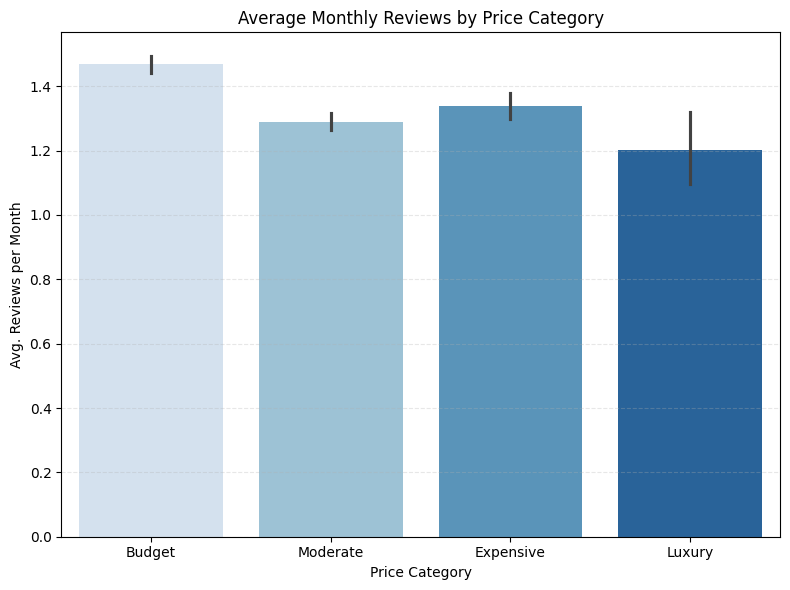

In [ ]:
# Plotting the dependency between price category and no. of reviews
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='price_category', y='reviews_per_month', estimator='mean', palette='Blues')
plt.title("Average Monthly Reviews by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Avg. Reviews per Month")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart with error bars is used to show both average values and their variability. It compares reviews_per_month across different price tiers.

##### 2. What is/are the insight(s) found from the chart?

**Budget listings** receive the highest average monthly reviews, suggesting strong customer engagement and demand in the **lower price** segment. Luxury listings have the lowest engagement, indicating lower booking frequency or guest feedback.


###3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Airbnb can prioritize promoting budget listings to boost traffic and retention.

**Negative:** Low engagement on luxury listings may hurt visibility, leading to underutilized high-revenue inventory.


### **CHART :** Dependency Between Min. Nights and Price

Text(0, 0.5, 'Price')

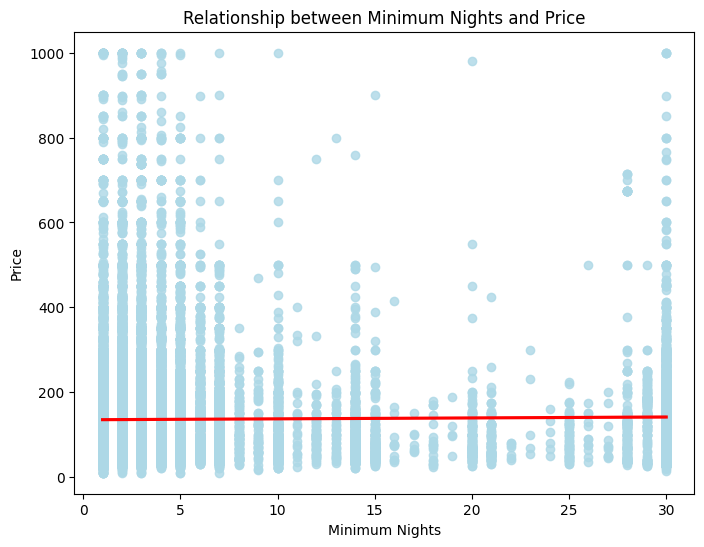

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='minimum_nights', y='price', scatter_kws={'color': 'lightblue'}, line_kws={'color': 'red'})
plt.title("Relationship between Minimum Nights and Price")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")

##### 1. Why did you pick the specific chart?

This is a scatter plot with a linear regression line, effectively a regression plot, used to visualize the relationship between "Minimum Nights" and "Price."

This chart type was chosen because it effectively visualizes the relationship between two continuous numerical variables ("Minimum Nights" and "Price"). It allows us to:

See individual data points: Revealing density, clusters (like the high concentration at 1-5 nights), and outliers.

Identify trends: The regression line helps illustrate the average direction and strength of the relationship (in this case, a very weak positive trend).

Assess variability: Showing the spread of prices for different minimum night durations.

##### 2. What is/are the insight(s) found from the chart?

 * Most listings are for short stays (1-5 nights) with wide price variability.
 * Listing availability significantly decreases for longer stays.
 * The regression line shows a very weak positive trend, indicating that while total price may slightly increase with longer stays, this doesn’t imply higher nightly rates — in fact, long-stay discounts might apply..

###3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Positive: Reinforces focus on short-term market (high volume), identifies niche for long-term growth (diversification), and guides host pricing strategies.
* Negative (Potential): Limited long-term inventory represents a missed market opportunity; weak average price correlation for longer stays could lead to host mispricing and user dissatisfaction if not managed with discounts.

### **CHART : Dependency b/w Minimum Nights and Price category (Bivariate)**

Text(0.5, 1.0, 'Average Minimum Nights by Price Category')

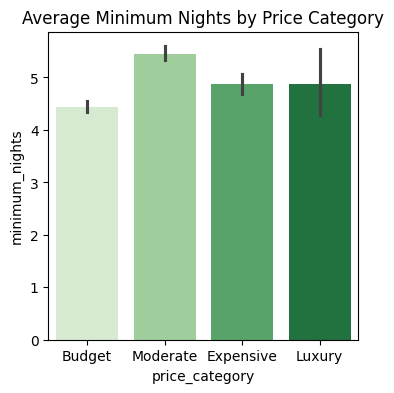

In [ ]:
# Numerical - Categorical Plot
#minimum_nights vs price_category analysis:
plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='price_category', y='minimum_nights', estimator='mean', palette='Greens')
plt.title("Average Minimum Nights by Price Category")

##### 1. Why did you pick the specific chart?

Bar plots provide a simple average comparison across clear categories.

##### 2. What is/are the insight(s) found from the chart?

Budget listings are more flexible, with shorter minimum stays.

This suggests that higher-priced listings may be less accessible to short-stay or weekend travelers.

There is some unpredictibility in Luxury listings' minimum nights.

3. Will the gained insights help creating any business impact?

 Budget listings can attract short-stay guests and drive higher booking frequency.(Thus verifying above Dependency Between Min. Nights and Price.)


**Chart -** Listings Per Host (Univariate)

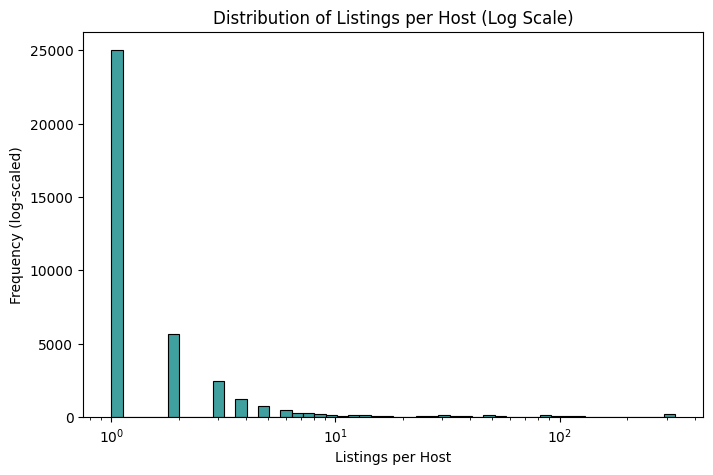

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['calculated_host_listings_count'], bins=50, log_scale=True, color='teal')
plt.title("Distribution of Listings per Host (Log Scale)")
plt.xlabel("Listings per Host")
plt.ylabel("Frequency (log-scaled)")
plt.show()

##### 1. Why did you pick the specific chart?

This histogram with a log-scaled x-axis effectively illustrates the distribution of the number of listings owned by each host. Airbnb hosts can own multiple listings, and this visualization helps identify how common that is — especially when most hosts have only one listing, and a few own many.


##### 2. What is/are the insight(s) found from the chart?

- Highly Skewed Distribution: The vast majority of hosts (~25,000) own only one listing, while a small number own dozens to hundreds.

- Power Law Distribution: A few power users (professional hosts or companies) dominate the listings.

- Potential Compliance or Regulatory Concern: Such outliers may violate short-term rental laws if multiple listings per host are not permitted in certain boroughs.


#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

- **Targeted Marketing:** Airbnb can tailor services for individual vs. commercial hosts.

- **Revenue Forecasting:** Commercial hosts are valuable customers; incentives can be designed for them.

**Negative :**

- **Regulatory Risk:** If professional hosts dominate in cities with restrictive laws (like NYC), Airbnb may face legal issues.

- **Market Saturation Risk:** Too many listings from a few hosts might discourage new entrants or create monopolistic pricing in popular areas.


**Chart -**  Heatmap of Price by Room Type and Neighbourhood Group

(Multivariate Plot)

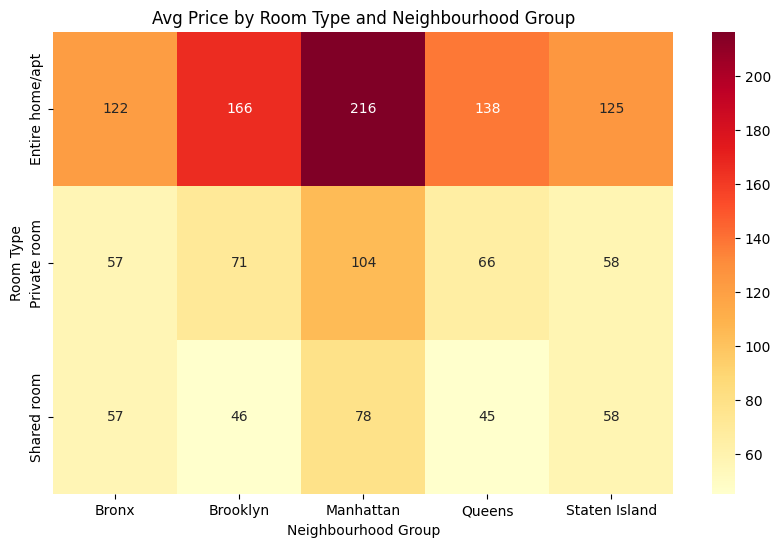

In [ ]:
pivot_table = df.pivot_table(index='room_type', columns='neighbourhood_group', values='price', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title("Avg Price by Room Type and Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Room Type")
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap was selected because it clearly shows how average prices vary across different combinations of room_type and neighbourhood_group. The color gradient and embedded numeric values make comparisons intuitive and highlight pricing hotspots across the city.

##### 2. What is/are the insight(s) found from the chart?

Manhattan has the highest prices across all room types, especially for Entire home/apt (~$216), indicating it’s the premium segment.

Brooklyn and Queens offer mid-tier pricing, while Bronx and Staten Island are more affordable.

Across all boroughs, Entire home/apt is most expensive, followed by Private room, then Shared room.(As found above too)


#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive :**

**Targeted Marketing :** This can guide Airbnb to promote lower-cost listings in outer boroughs to budget travelers, or high-end stays in Manhattan to premium customers.

**Dynamic Pricing Models :** Insights help adjust prices based on demand and competition, optimizing host earnings and platform revenue.

**Geographic Expansion Strategy :** Airbnb can use this data to encourage more listings in underrepresented boroughs (e.g., Queens or Staten Island).

**Negative :**

**Affordability Concerns :** High prices in central locations might make Airbnb less accessible for average tourists, pushing them to competitors.

**Regulatory Scrutiny :** Manhattan's dominance might attract attention from local authorities concerned about housing shortages.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Solutions Suggested :**

* Budget listings dominate the market, especially in Brooklyn and Queens, indicating high demand for affordable stays.

* Entire homes/apartments charge higher across all neighbourhoods, particularly in Manhattan.

* Private rooms are most common, balancing affordability and privacy, especially in outer boroughs.

* Luxury listings have lower average review counts, suggesting they attract fewer but possibly longer-staying guests.

* Top-rated hosts are mostly located in Brooklyn and Manhattan, signaling strong service quality in these areas.

* Listings with fewer minimum nights (mostly budget) see higher monthly reviews, ideal for short-term tourists.

* Availability is heavily skewed, with many listings either always available or not available at all.

* Price and number of reviews show a weak negative correlation, suggesting lower-priced listings are reviewed more often.

* Minimum nights and price show low correlation, indicating stay duration doesn't strongly affect pricing.

* Listings in dense tourist zones (Manhattan, Brooklyn) show higher listing volumes and prices on average.

* Pie charts show top host concentration, implying high service quality is unevenly distributed.

* Limit the number of listings per host to encourage fair participation.

* Shared rooms are least popular, suggesting low demand unless marketed with unique appeal.






# **Conclusion**

* The NYC Airbnb 2019 market is heavily driven by affordability and location, with strong guest preference for budget stays in central boroughs like Brooklyn and Manhattan.

* Listings with greater availability and shorter minimum nights receive more engagement, indicating high guest flexibility demand.

* Correlation analysis reveals strong dependency between number of reviews and reviews per month, suggesting that consistent guest flow leads to better visibility.

* The luxury segment underperforms in both reach and review volume, highlighting a need for better positioning or incentives.

* Tailoring pricing and availability based on room type and borough can significantly optimize occupancy and revenue.

* Most hosts have a single listing,so capping excess listings helps prevent market domination.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***